# Question 1(a)

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


car_sales = "car_sales_data_1.csv"
df_cars = pd.read_csv(car_sales)
print(df_cars)



      Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  Fuel Type Category  
0       127300   

### Ranking Fuel Types

In [2]:
# Encoding the "Fuel type" column using LabelEncoder
fuel_encoder = LabelEncoder()
df_cars["Fuel Type Category"] = fuel_encoder.fit_transform(df_cars["Fuel type"])

# Saving the modified DataFrame back to a CSV file
df_cars.to_csv("car_sales_data_1.csv", index=False)

print(df_cars[["Fuel type", "Fuel Type Category"]].head())

  Fuel type  Fuel Type Category
0    Petrol                   2
1    Petrol                   2
2    Diesel                   0
3    Hybrid                   1
4    Petrol                   2


###  Using Year of Manufacture as Independent Variable 

In [3]:
# Linear regression on the "Year of manufacture" feature
x = df_cars["Year of manufacture"]
y = df_cars["Price"]
range_year = max(df_cars["Year of manufacture"]) - min(df_cars["Year of manufacture"])
x= x.to_numpy().reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the test set." % (len(x_test), ))
print("Maximum Year of Manufacture: ", max(df_cars["Year of manufacture"]), "Minimum Year of Manufacture: ", min(df_cars["Year of manufacture"]))
print("Range: ", range_year)

There are 40000 data points in the training set.
There are 10000 data points in the test set.
Maximum Year of Manufacture:  2022 Minimum Year of Manufacture:  1984
Range:  38


### Standardizing Input Variable

In [4]:
# Standardizing the features
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

### Building Linear Model and Training

In [5]:
# Training linear regression model
year_linear = LinearRegression()
year_linear.fit(x_train_scaled, y_train)

LinearRegression()

### Building Polynomial Model and Training

In [6]:
# Polynomial regression of degree 3
poly = PolynomialFeatures(degree = 3, include_bias = False) # using degree 3
x_poly = poly.fit_transform(x_train_scaled)

year_poly = LinearRegression()
year_poly.fit(x_poly, y_train)

LinearRegression()

### Linear Fit Coefficients

In [7]:
gradient = year_linear.coef_[0]
intercept = year_linear.intercept_

print("Gradient: ", gradient)
print("Intercept: ", intercept)

Gradient:  11711.62203633284
Intercept:  13854.628699999997


### Polynomial Fit Coefficients

In [8]:
coefficients = year_poly.coef_
intercept = year_poly.intercept_

print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [9001.14272175 5606.25336544 1605.85601456]
intercept:  8356.058188953595


### Evaluating Model Using Linear Testing Dataset

In [9]:
# Predictions and evaluation
year_pred = year_linear.predict(x_test_scaled)
mean_abs = mean_absolute_error(y_test, year_pred)
mean_squared = mean_squared_error(y_test, year_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, year_pred)

print("Prediction: ", year_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [33004.24314631 30575.12941694 24502.3450935  ... 33004.24314631
 -3432.46279432 28146.01568756]
Mean absolute error:  7031.039208674777
Mean squared error:  132678999.94793089
Root mean squared error:  11518.637069893768
R2:  0.5110865244812854


### Evaluating Model Using Polynomial Testing Dataset

In [10]:
# Polynomial regression predictions and evaluation
x_test_poly = poly.fit_transform(x_test_scaled)
year_pred = year_poly.predict(x_test_poly)
mean_abs = mean_absolute_error(y_test, year_pred)
mean_squared = mean_squared_error(y_test, year_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, year_pred)

print("Prediction: ", year_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [45082.27443087 37307.06094626 22380.24379495 ... 45082.27443087
  2120.07946394 30605.96800478]
Mean absolute error:  5186.868941344755
Mean squared error:  103043508.14527172
Root mean squared error:  10151.034831251034
R2:  0.6202913820821918


### Using Engine Size as Independent Variable

In [11]:
x = df_cars["Engine size"]
y = df_cars["Price"]
range_size = max(df_cars["Engine size"]) - min(df_cars["Engine size"])
x= x.to_numpy().reshape(-1, 1)
x_train, x_test, y_tain, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the test set." % (len(x_test), ))
print("Maximum Engine Size: ", max(df_cars["Engine size"]), "Minimum Engine Size: ", min(df_cars["Engine size"]))
print("Range: ", range_size)

There are 40000 data points in the training set.
There are 10000 data points in the test set.
Maximum Engine Size:  5.0 Minimum Engine Size:  1.0
Range:  4.0


### Standardizing Input Variable

In [12]:
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

### Building Linear Model and Training

In [13]:
size_linear = LinearRegression()
size_linear.fit(x_train_scaled, y_train)

LinearRegression()

### Building Polynomial Model and Training

In [14]:
poly = PolynomialFeatures(degree = 3, include_bias = False) # using degree 3
x_poly = poly.fit_transform(x_train_scaled)

size_poly = LinearRegression()
size_poly.fit(x_poly, y_train)

LinearRegression()

### Linear Fit Coefficients

In [15]:
gradient = size_linear.coef_[0]
intercept = size_linear.intercept_

print("Gradient: ", gradient)
print("Intercept: ", intercept)

Gradient:  6575.6599959915
Intercept:  13854.6287


### Polynomial Fit Coefficients

In [16]:
coefficients = size_poly.coef_
intercept = size_poly.intercept_

print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [6243.82811939  969.78661393 -203.54376549]
intercept:  13307.764509023651


### Evaluating Model Using Linear Testing Dataset

In [17]:
size_pred = size_linear.predict(x_test_scaled)
mean_abs = mean_absolute_error(y_test, size_pred)
mean_squared = mean_squared_error(y_test, size_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, size_pred)

print("Prediction: ", size_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [19437.37821056 14093.11638401 12311.69577516 ... 12311.69577516
 15874.53699286 15874.53699286]
Mean absolute error:  10817.491562557909
Mean squared error:  230499154.4527912
Root mean squared error:  15182.198604049125
R2:  0.15062562461380224


### Evaluating Model Using Polynomial Testing Dataset

In [18]:
x_test_poly = poly.fit_transform(x_test_scaled)
size_pred = size_poly.predict(x_test_poly)
mean_abs = mean_absolute_error(y_test, size_pred)
mean_squared = mean_squared_error(y_test, size_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, size_pred)

print("Prediction: ", size_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [19183.25315024 13535.48316472 11898.71706707 ... 11898.71706707
 15311.34943363 15311.34943363]
Mean absolute error:  10802.868982730883
Mean squared error:  230076036.26779434
Root mean squared error:  15168.257522464284
R2:  0.15218478757450582


### Using Mileage as Independent Variable

In [19]:
x = df_cars["Mileage"]
y = df_cars["Price"]
range_mileage = max(df_cars["Mileage"]) - min(df_cars["Mileage"])
x= x.to_numpy().reshape(-1, 1)
x_train, x_test, y_tain, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("There are %d data points in the training set." % (len(x_train), ))
print("There are %d data points in the test set." % (len(x_test), ))
print("Maximum Mileage: ", max(df_cars["Mileage"]), "Minimum Mileage: ", min(df_cars["Mileage"]))
print("Range: ", range_mileage)

There are 40000 data points in the training set.
There are 10000 data points in the test set.
Maximum Mileage:  453537 Minimum Mileage:  630
Range:  452907


### Standardizing Input Variable

In [20]:
scale = StandardScaler()
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

### Building Linear Model and Training

In [21]:
mileage_linear = LinearRegression()
mileage_linear.fit(x_train_scaled, y_train)

LinearRegression()

### Building Polynomial Model and Training

In [22]:
poly = PolynomialFeatures(degree = 3, include_bias = False) # using degree 3
x_poly = poly.fit_transform(x_train_scaled)

mileage_poly = LinearRegression()
mileage_poly.fit(x_poly, y_train)

LinearRegression()

### Linear Fit Coefficients

In [23]:
gradient = mileage_linear.coef_[0]
intercept = mileage_linear.intercept_

print("Gradient: ", gradient)
print("Intercept: ", intercept)

Gradient:  -10374.075445707309
Intercept:  13854.6287


### Polynomial Fit Coefficients

In [24]:
coefficients = mileage_poly.coef_
intercept = mileage_poly.intercept_

print("coefficients: ", coefficients)
print("intercept: ", intercept)

coefficients:  [-11314.73778039   7145.09509174  -1383.15059083]
intercept:  7715.88190719047


### Evaluating Model Using Linear Testing Dataset

In [25]:
mileage_pred = mileage_linear.predict(x_test_scaled)
mean_abs = mean_absolute_error(y_test, mileage_pred)
mean_squared = mean_squared_error(y_test, mileage_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, mileage_pred)

print("Prediction: ", mileage_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [ 27031.73878132  26860.24935829  18594.40118367 ...  26809.51284261
 -13734.90661356  26102.68069832]
Mean absolute error:  7964.784670024687
Mean squared error:  162468566.87254104
Root mean squared error:  12746.315815659875
R2:  0.4013139100884707


### Evaluating Model Using Polynomial Testing Dataset

In [26]:
x_test_poly = poly.fit_transform(x_test_scaled)
mileage_pred = mileage_poly.predict(x_test_poly)
mean_abs = mean_absolute_error(y_test, mileage_pred)
mean_squared = mean_squared_error(y_test, mileage_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, mileage_pred)

print("Prediction: ", mileage_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Prediction:  [36450.23525686 35855.86295481 14508.84818519 ... 35681.30839507
  2143.51614657 33310.41128831]
Mean absolute error:  5815.669418610492
Mean squared error:  122123243.4158437
Root mean squared error:  11050.93857624065
R2:  0.5499837999721879


### Plots Comparisons (Linear)

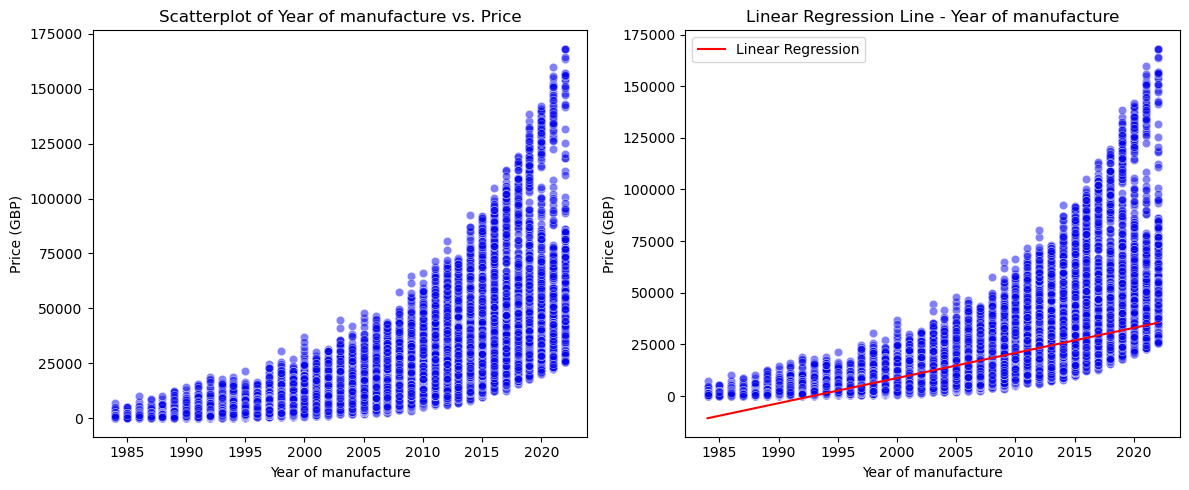

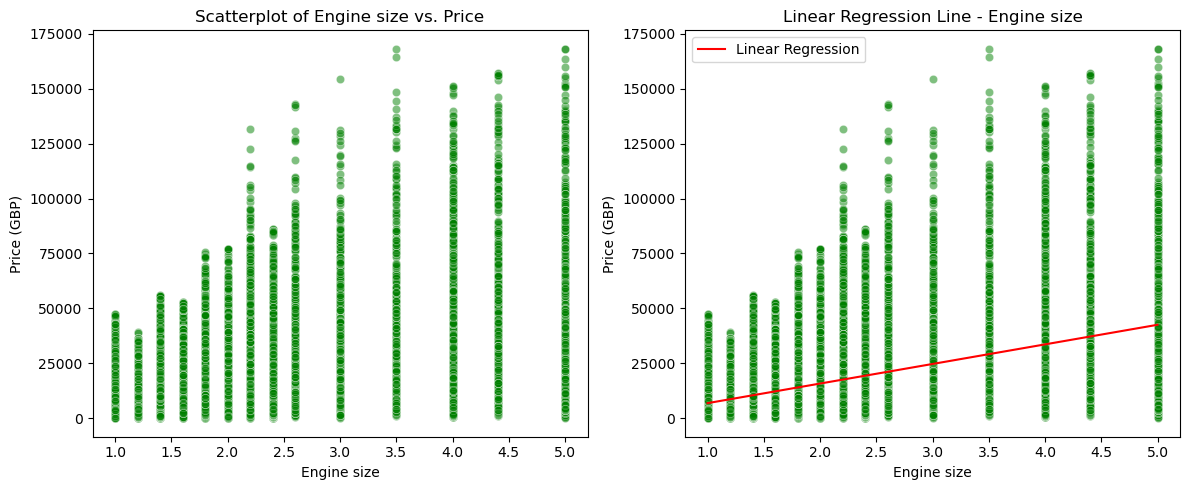

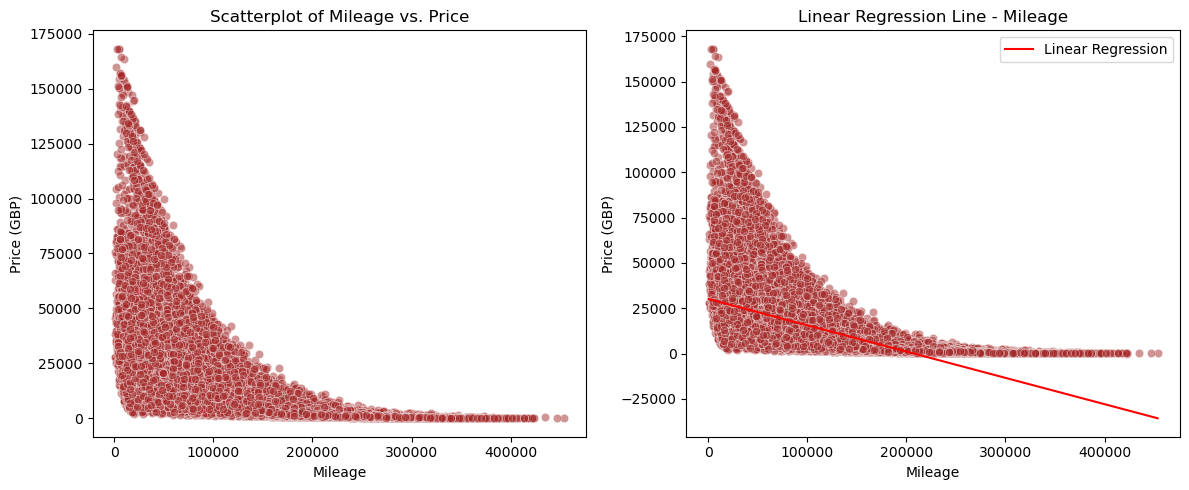

In [27]:
features = ["Year of manufacture", "Engine size", "Mileage"]
colors = ['blue', 'green', 'brown']

linear_models = []

for i, feature in enumerate(features):
    # Scatterplot
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data = df_cars, x = feature, y = "Price", color = colors[i], alpha = 0.5)
    plt.title(f"Scatterplot of {feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price (GBP)")

    # Linear regression
    linear_model = LinearRegression()
    x_feature = df_cars[feature].to_numpy().reshape(-1, 1)
    x_feature_scaled = scale.transform(x_feature)
    linear_model.fit(x_feature_scaled, df_cars["Price"])
    linear_models.append(linear_model)

    # Linear regression line
    plt.subplot(1, 2, 2)
    x_fit = np.linspace(df_cars[feature].min(), df_cars[feature].max(), 100).reshape(-1, 1)
    x_fit_scaled = scale.transform(x_fit)
    y_fit = linear_model.predict(x_fit_scaled)

    sns.scatterplot(data = df_cars, x = feature, y = "Price", color = colors[i], alpha = 0.5)
    plt.plot(x_fit, y_fit, color = 'red', label = 'Linear Regression')
    plt.title(f"Linear Regression Line - {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price (GBP)")
    plt.legend()

    plt.tight_layout()
    plt.savefig(f"L_{feature.lower()}.png")
    plt.show()


### Plots Comparisons (Polynomial)

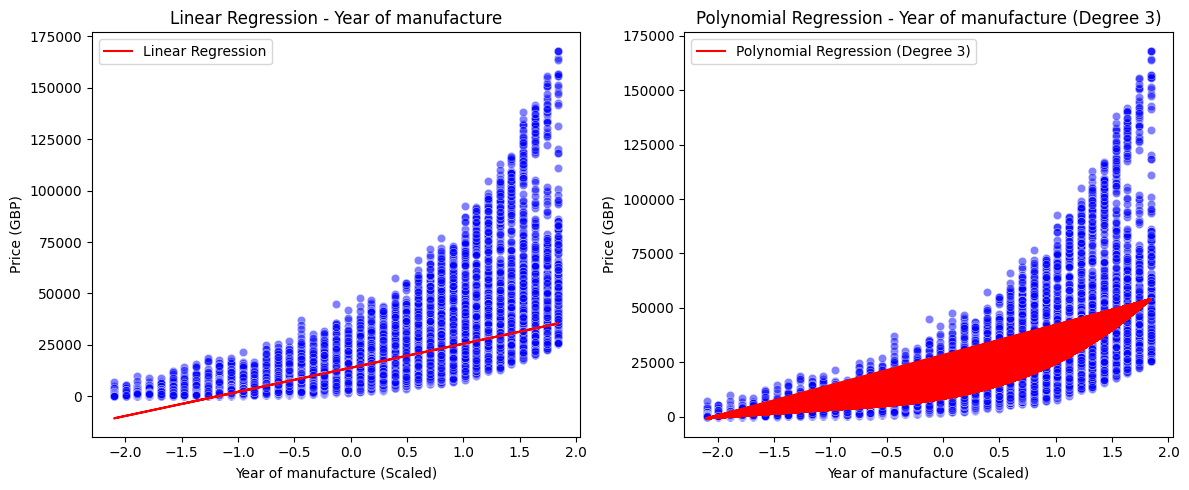

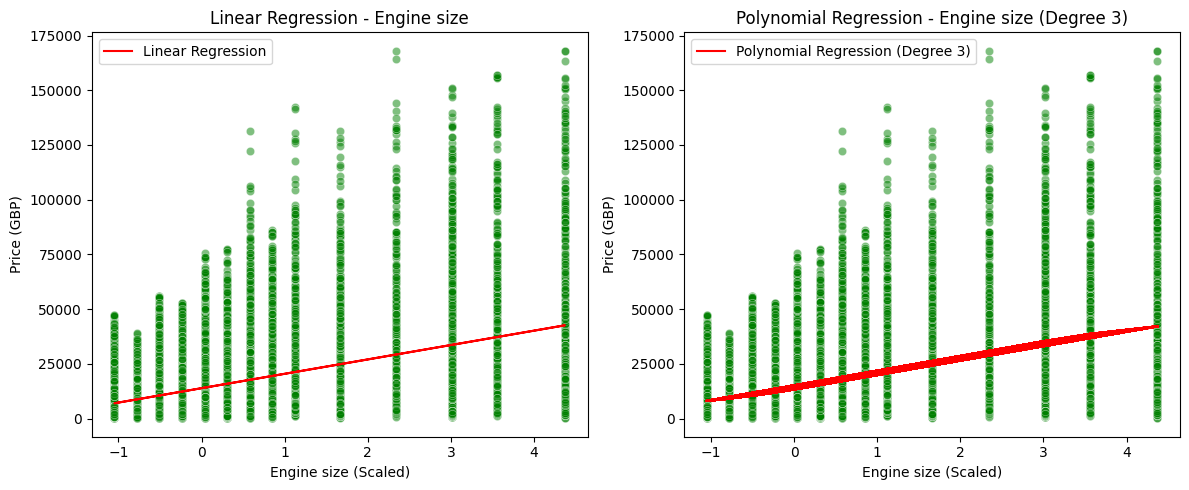

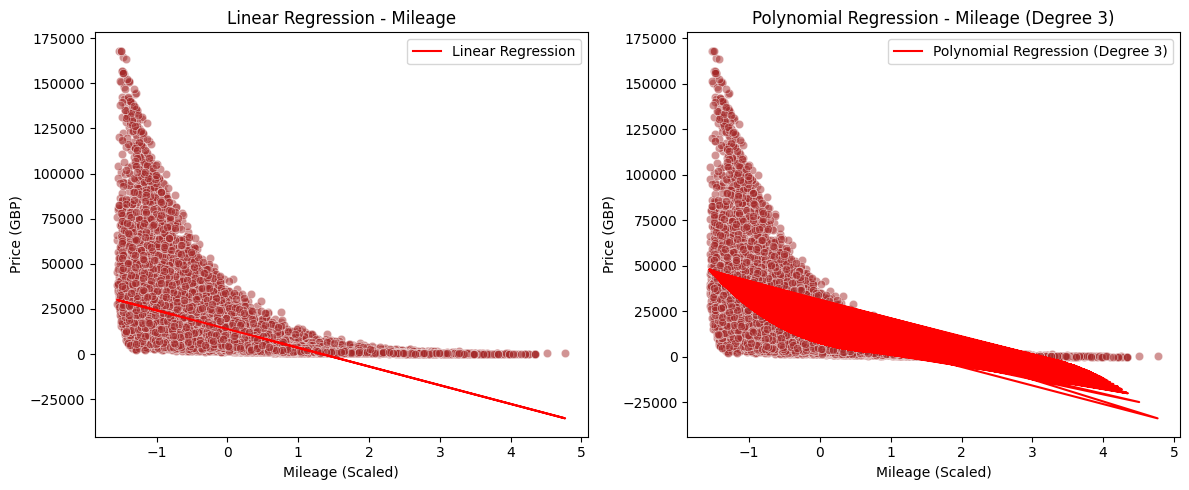

In [100]:
# Loop through each feature and color
for i, (feature, color) in enumerate(zip(features, colors)):
    # Select the corresponding feature and reshape it
    x = df_cars[feature].to_numpy().reshape(-1, 1)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

    # Standardize the features
    scale = StandardScaler()
    x_train_scaled = scale.fit_transform(x_train)
    x_test_scaled = scale.transform(x_test)

    # Linear regression
    linear_model = LinearRegression()
    linear_model.fit(x_train_scaled, y_train)

    # Polynomial regression
    degree = 3  # We can experiment with different polynomial degrees
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    x_poly_train = poly_features.fit_transform(x_train_scaled)
    x_poly_test = poly_features.transform(x_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(x_poly_train, y_train)

    # Scatterplot and regression lines
    plt.figure(figsize = (12, 5))

    # Scatterplot for linear regression
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = x_train_scaled.flatten(), y = y_train, color = color, alpha = 0.5)
    plt.plot(x_train_scaled, linear_model.predict(x_train_scaled), color = 'red', label = 'Linear Regression')
    plt.title(f"Linear Regression - {feature}")
    plt.xlabel(f"{feature} (Scaled)")
    plt.ylabel("Price (GBP)")
    plt.legend()

    # Scatterplot for polynomial regression
    plt.subplot(1, 2, 2)
    sns.scatterplot(x = x_train_scaled.flatten(), y = y_train, color = color, alpha = 0.5)
    plt.plot(x_train_scaled, poly_model.predict(x_poly_train), color = 'red', label = f'Polynomial Regression (Degree {degree})')
    plt.title(f"Polynomial Regression - {feature} (Degree {degree})")
    plt.xlabel(f"{feature} (Scaled)")
    plt.ylabel("Price (GBP)")
    plt.legend()

    plt.savefig(f"P_{feature.lower()}.png")
    plt.tight_layout()
    plt.show()


# Question 1 (b)

### Multi Linear Regression Model

In [28]:
feature_names = ["Year of manufacture", "Engine size", "Mileage"]
x = df_cars[feature_names]

# Extracting the output feature
y = df_cars["Price"]

# Spliting the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creating an instance of the StandardScaler class
scale = StandardScaler()

# Fitting the standard scaler to the input data that we have in x_train
scale.fit(x_train)

# Now applying the standard scaler transformation to both the training and the testing sets
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Creating an instance of the model
m_linear = LinearRegression()

# Fit the model to the training data.
m_linear.fit(x_train_scaled, y_train)

# Getting the fit coefficients from the best-fit model
intercept = m_linear.intercept_
coefficients = m_linear.coef_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the outputs in the testing dataset
m_pred = m_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, m_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, m_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, m_pred)
# Print the results

print("Predicted: ", m_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 9520.41488938  6594.02448017 -2720.41736808]
intercept:  13854.628699999997
Predicted:  [38475.21583606 31096.42421515 22205.87058164 ... 31271.35800273
 -5407.42011207 30709.52672535]
Mean absolute error:  6091.458141656244
Mean squared error:  89158615.76017143
Root mean squared error:  9442.38400829851
R2:  0.671456306417368


# Question 1 (c)

### Random Forest Regression Model

In [29]:
feature_names = ["Year of manufacture", "Engine size", "Mileage", "Fuel Type Category"]
x = df_cars[feature_names]

# Extracting the output feature
y = df_cars["Price"]

# Spliting the x and y data between the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creating an instance of the StandardScaler class
scale = StandardScaler()

# Fitting the standard scaler to the input data that we have in x_train
scale.fit(x_train)

# Now applying the standard scaler transformation to both the training and the testing sets
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Creating an instance of the model
RF_linear = RandomForestRegressor()

# Fitting the model to the training data
RF_linear.fit(x_train_scaled, y_train)

# Using the final, trained model to predict the outputs of the testing dataset
RF_pred = RF_linear.predict(x_test_scaled)

# Calculating the mean absolute error
mean_abs = mean_absolute_error(y_test, RF_pred)
# Calculating the mean squared error
mean_squared = mean_squared_error(y_test, RF_pred)
# Calculating the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, RF_pred)

# Print the results

print("Predicted: ", RF_pred)
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Predicted:  [67962.93 31473.44 15122.46 ... 38604.33   541.52 32032.36]
Mean absolute error:  1659.918922633333
Mean squared error:  14630763.73647001
Root mean squared error:  3825.018135443283
R2:  0.9460865883018568


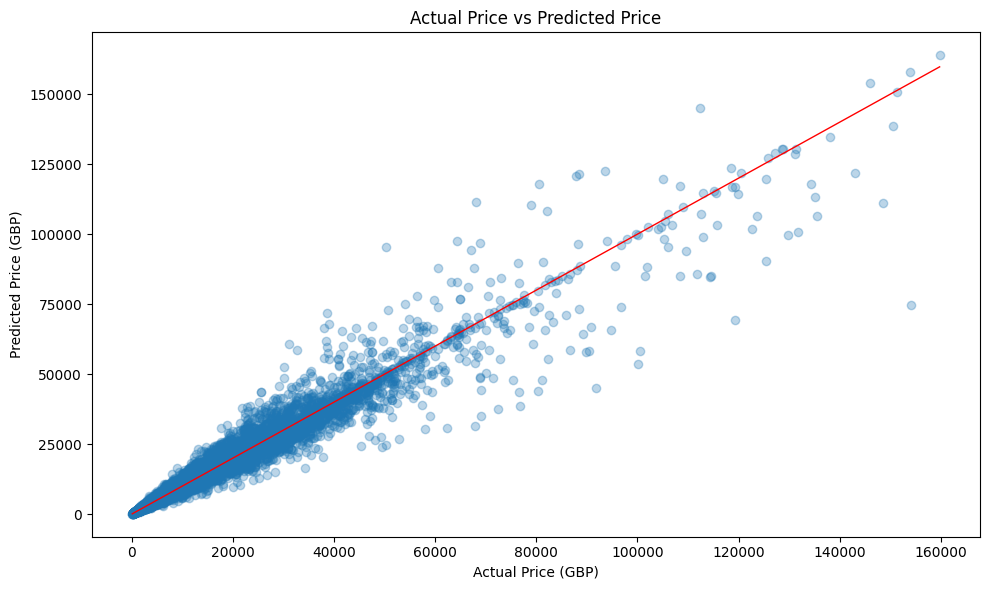

In [103]:
# Plotting the scatterplot
plt.figure(figsize = (10, 6))

plt.scatter(y_test, RF_pred, alpha = 0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', linewidth = 1)

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price (GBP)')
plt.ylabel('Predicted Price (GBP)')

plt.tight_layout()
plt.savefig('scatterplot_actual_vs_predicted.png')
plt.show()


### Trend: There is a strong positive correlation between actual and predicted prices, forming a diagonal line. This indicates that my model's predictions are close to the actual prices with Random Forest Regression Model.

# Question 1 (d)

### Developing an Artificial Neural Network (ANN) model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/80


1125/11

1125/1125 [==============================] - 2s 2ms/step - loss: 18668382.0000 - mean_squared_error: 18668382.0000 - val_loss: 16782434.0000 - val_mean_squared_error: 16782434.0000
Epoch 34/80
1125/1125 [==============================] - 2s 2ms/step - loss: 18342616.0000 - mean_squared_error: 18342616.0000 - val_loss: 16577499.0000 - val_mean_squared_error: 16577499.0000
Epoch 35/80
1125/1125 [==============================] - 2s 2ms/step - loss: 18409382.0000 - mean_squared_error: 18409382.0000 - val_loss: 16497326.0000 - val_mean_squared_error: 16497326.0000
Epoch 36/80
1125/1125 [==============================] - 3s 2ms/step - loss: 18380294.0000 - mean_squared_error: 18380294.0000 - val_loss: 16394655.0000 - val_mean_squared_error: 16394655.0000
Epoch 37/80
1125/1125 [==============================] - 3s 3ms/step - loss: 18532438.0000 - mean_squared_error: 18532438.0000 - val_loss: 16798408.0000 - val_mean_squared_error: 16798408.0000
Epoch 38/80
1125/1125 [========================

1125/1125 [==============================] - 3s 2ms/step - loss: 17662074.0000 - mean_squared_error: 17662074.0000 - val_loss: 16485772.0000 - val_mean_squared_error: 16485772.0000
Epoch 76/80
1125/1125 [==============================] - 3s 2ms/step - loss: 17730174.0000 - mean_squared_error: 17730174.0000 - val_loss: 16273639.0000 - val_mean_squared_error: 16273639.0000
Epoch 77/80
1125/1125 [==============================] - 3s 2ms/step - loss: 17705522.0000 - mean_squared_error: 17705522.0000 - val_loss: 16062297.0000 - val_mean_squared_error: 16062297.0000
Epoch 78/80
1125/1125 [==============================] - 3s 2ms/step - loss: 17572814.0000 - mean_squared_error: 17572814.0000 - val_loss: 16340382.0000 - val_mean_squared_error: 16340382.0000
Epoch 79/80
1125/1125 [==============================] - 3s 2ms/step - loss: 17655182.0000 - mean_squared_error: 17655182.0000 - val_loss: 16141721.0000 - val_mean_squared_error: 16141721.0000
Epoch 80/80
313/313 [==========================

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_552\716877492.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, price_range], [0, price_range], 'k-', color='red')  # Adjusted line color to red


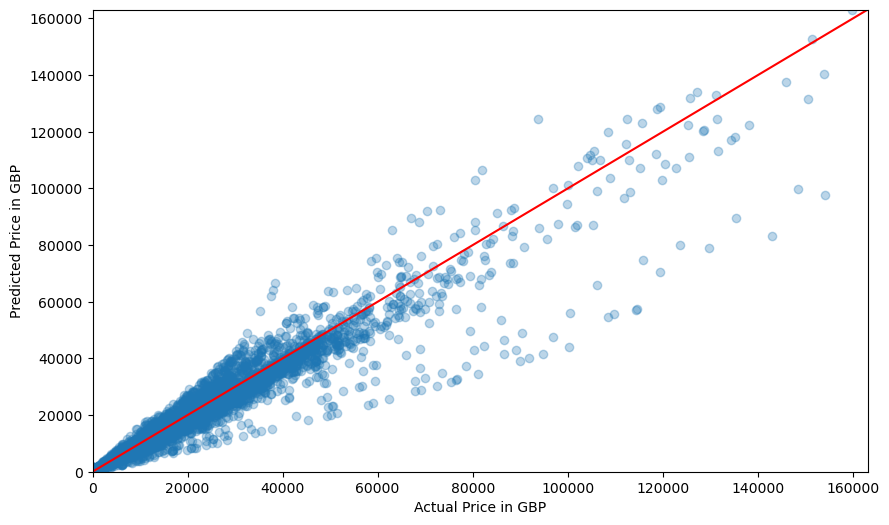

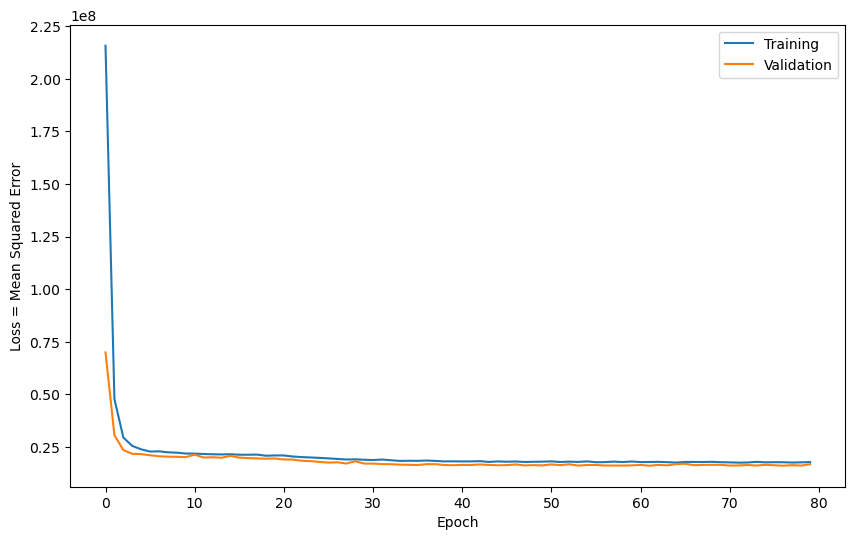

In [30]:
# Selecting numerical features
feature_names = ['Year of manufacture', 'Engine size', 'Mileage']
x_numerical = df_cars[feature_names]


# Scaling numerical features using MinMaxScaler
scale = MinMaxScaler()
scale.fit(x_numerical)
x_numerical_scaled = scale.transform(x_numerical)

# Encoding categorical feature ('Fuel type') using LabelEncoder
x_cat = df_cars["Fuel type"]

label = LabelEncoder()
label.fit(x_cat)
x_cat_label = label.transform(x_cat)

x_cat_label = x_cat_label.reshape(-1, 1)

# Concatenating scaled numerical features and encoded categorical feature
x = np.concatenate((x_numerical_scaled, x_cat_label), axis = 1)

# Target variable
y = df_cars["Price"]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creating a Sequential model in Keras
model = Sequential()
model.add(Dense(units = 64, input_dim = (4), activation = "relu"))

model.add(Dropout(0.1))

model.add(Dense(units = 64, activation = "relu"))

model.add(Dense(units = 64, activation = "relu"))

model.add(Dense(units = 1, activation = "linear"))

# Displaying the model summary
model.summary()

# Compiling the model
model.compile(optimizer="adam", loss='mean_squared_error', metrics='mean_squared_error')

# Setting up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

# Training the model
history = model.fit(x = x_train, y = y_train, batch_size = None, epochs = 80, verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

# Predicting on the test set
y_pred = model.predict(x_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))

# Get the range of actual prices and predicted prices
price_range = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, price_range], [0, price_range], 'k-', color='red')  # Adjusted line color to red

plt.xlabel("Actual Price in GBP")
plt.ylabel("Predicted Price in GBP")

# Set dynamic plot limits based on the data range
plt.xlim(0, price_range)
plt.ylim(0, price_range)
plt.savefig('ANN1.png')
plt.show()


# Plotting training and validation loss over epochs
history_df = pd.DataFrame(history.history)

plt.figure(figsize = (10, 6))
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
plt.savefig('ANN.png')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae_ann = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse_ann = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse_ann = np.sqrt(mse_ann)

# Calculate R2 score
r2_ann = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) for ANN: {mae_ann}")
print(f"Mean Squared Error (MSE) for ANN: {mse_ann}")
print(f"Root Mean Squared Error (RMSE) for ANN: {rmse_ann}")
print(f"R2 Score for ANN: {r2_ann}")


Mean Absolute Error (MAE) for ANN: 1865.6155236755371
Mean Squared Error (MSE) for ANN: 18357609.25812563
Root Mean Squared Error (RMSE) for ANN: 4284.5780723573735
R2 Score for ANN: 0.9323534052251898


# Question 1 (f)

### k-Means Clustering Algorithm

### Year of Manufacture & Price

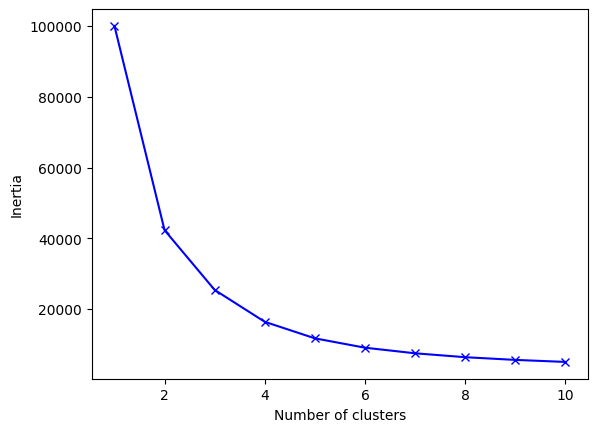

In [107]:
# Selecting features for clustering
feature_names = ["Year of manufacture", "Price"]
x = df_cars[feature_names]


# Standardizing the features using StandardScaler
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# Initializing lists to store inertia values for different cluster numbers
inertia = []
k_range = range(1, 11)

# Looping through different cluster numbers (k) to find the optimal number of clusters
for k in k_range:
    # Creating a KMeans model with the current number of clusters    
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    # Fitting the scaled data to the KMeans model
    kmeans.fit(x_scaled)
    # Appending the inertia (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve to determine the optimal number of clusters
plt.plot(k_range, inertia, 'bx-')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig('elbow1_manufacture.png')
plt.show()

Davies Bouldin Index: 0.6865
Silhouette Coefficient: 0.5140


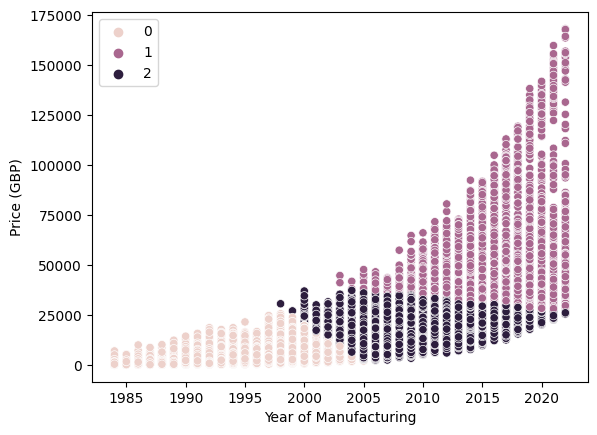

In [108]:
kmeans_final = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans_final.fit(x_scaled)
cluster_labels_pred = kmeans_final.predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

sns.scatterplot(data = df_cars, x = "Year of manufacture", y = "Price", hue = cluster_labels_pred)

plt.legend(loc = "upper left")
plt.xlabel("Year of Manufacturing")
plt.ylabel("Price (GBP)")
plt.savefig('kmean_manufac.png')
plt.show()

### We can see the three clusters identified with this algorithm, which have been labelled as 0, 1 or 2. Based on this plot, we could interpret these clusters as follows:
### (0) - Cars with a Earlier Year of Manufacture, and a Lower Price
### (1) - Cars with a Later Year of Manufacture, and a High Price
### (2) - Cars with a Mid or Later Year of Manufacture, and a Lower Price

### Engine Size & Price

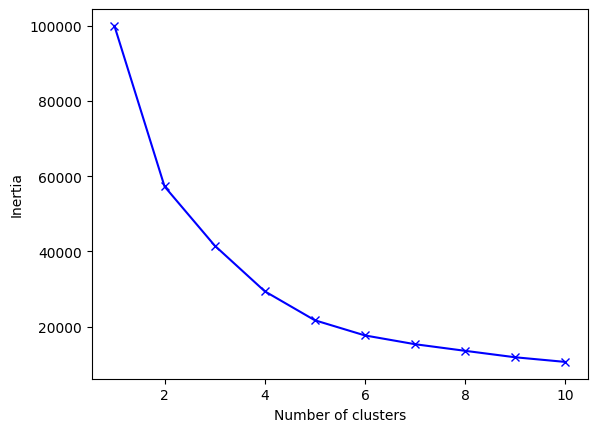

In [109]:
feature_names = ["Engine size", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig('Elbow_engine.png')
plt.show()

Davies Bouldin Index: 0.7655
Silhouette Coefficient: 0.4922


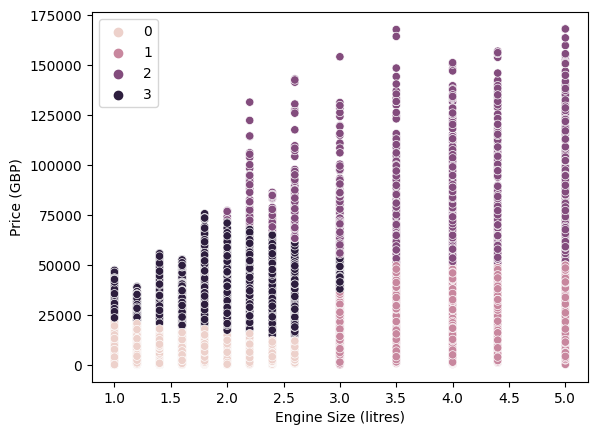

In [110]:
kmeans_final = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
kmeans_final.fit(x_scaled)
cluster_labels_pred = kmeans_final.predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

sns.scatterplot(data = df_cars, x = "Engine size", y = "Price", hue = cluster_labels_pred)

plt.legend(loc = "upper left")
plt.xlabel("Engine Size (litres)")
plt.ylabel("Price (GBP)")
plt.savefig('kmean_engine.png')
plt.show()

### We can see the three clusters identified with this algorithm, which have been labelled as 0, 1, 2 or 3. Based on this plot, we could interpret a mixed result as we can see in above graph

### Mileage & Price

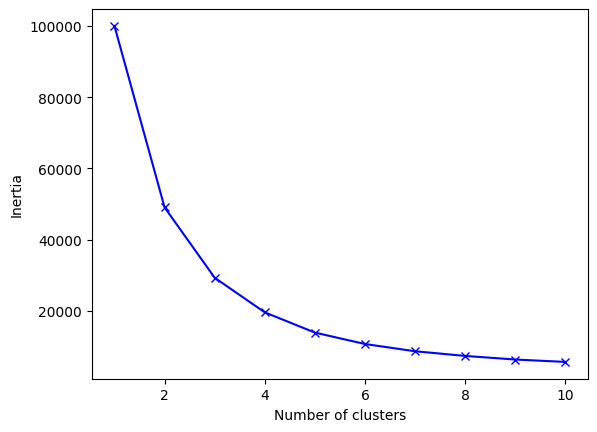

In [111]:
feature_names = ["Mileage", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.savefig('elbow_mileage.png')
plt.show()

Davies Bouldin Index: 0.6881
Silhouette Coefficient: 0.4781


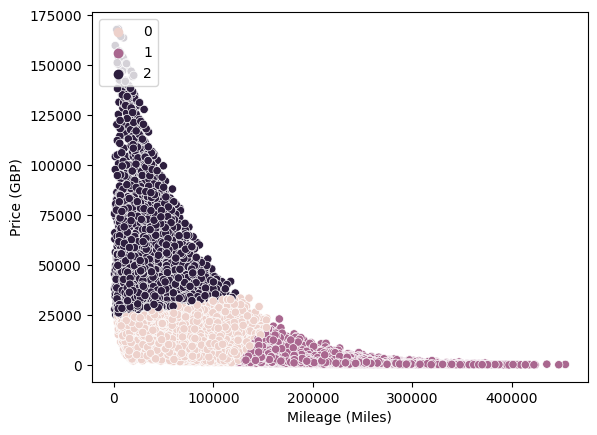

In [112]:
kmeans_final = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans_final.fit(x_scaled)
cluster_labels_pred = kmeans_final.predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

sns.scatterplot(data = df_cars, x = "Mileage", y = "Price", hue = cluster_labels_pred)

plt.legend(loc = "upper left")
plt.xlabel("Mileage (Miles)")
plt.ylabel("Price (GBP)")
plt.savefig('kmean_mileage.png')
plt.show()

### We can see the three clusters identified with this algorithm, which have been labelled as 0, 1 or 2. Based on this plot, we could interpret these clusters as follows:
### (0) - Cars with Lower Mileage, and a Lower Price
### (1) - Cars with Higher Mileage, and a Lower Price
### (2) - Cars with Lower Mileage, and Higher Price

# Question 1 (g)

### Hierarchical Clustering Algorithm (Agglomerative Clustering Method)

### Year of Manufacture and Price

In [113]:
feature_names = ["Year of manufacture", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agg_labels_pred = agg_model.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)



In [114]:
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.4639
Silhouette Score: 0.6377


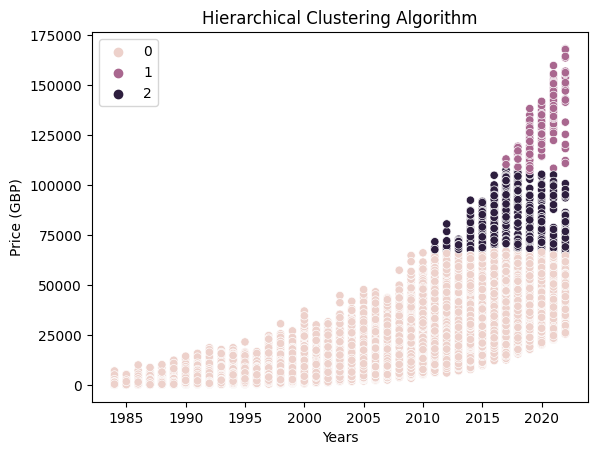

In [115]:
sns.scatterplot(data = df_cars, x = "Year of manufacture", y = "Price", hue = agg_labels_pred)

plt.title("Hierarchical Clustering Algorithm")
plt.xlabel("Years")
plt.ylabel("Price (GBP)")

plt.savefig('hca_manufac.png')
plt.show()



### Engine Size and Price

In [116]:
feature_names = ["Engine size", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agg_labels_pred = agg_model.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)

In [117]:
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.6576
Silhouette Score: 0.6205


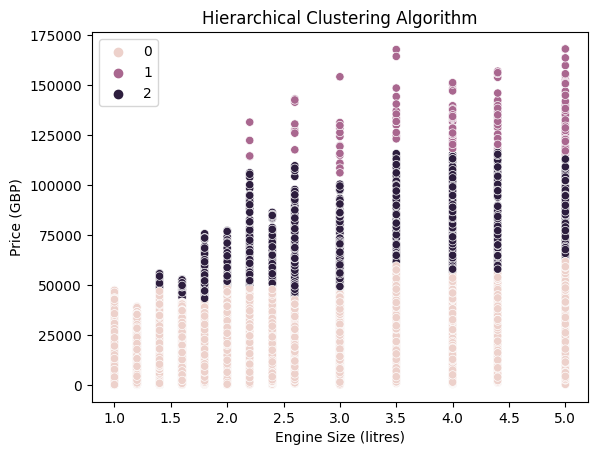

In [118]:
sns.scatterplot(data = df_cars, x = "Engine size", y = "Price", hue = agg_labels_pred)

plt.title("Hierarchical Clustering Algorithm")
plt.xlabel("Engine Size (litres)")
plt.ylabel("Price (GBP)")

plt.savefig('hca_engine.png')
plt.show()


### Mileage and Price

In [119]:
feature_names = ["Mileage", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agg_labels_pred = agg_model.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)

In [120]:
print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

Davies Bouldin Score: 0.5643
Silhouette Score: 0.4329


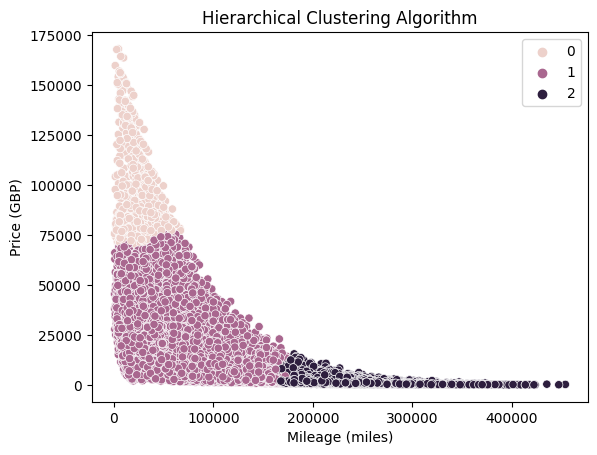

In [121]:
sns.scatterplot(data = df_cars, x = "Mileage", y = "Price", hue = agg_labels_pred)

plt.title("Hierarchical Clustering Algorithm")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

plt.savefig('hca_mileage.png')
plt.show()


### DBSCAN

### Year of Manufacture & Price

In [122]:
feature_names = ["Year of manufacture", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# set the eps and min_samples parameters.
dbscan = DBSCAN(eps = 0.2, min_samples = 3)
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 1.4952
Silhouette Coefficient: 0.6763


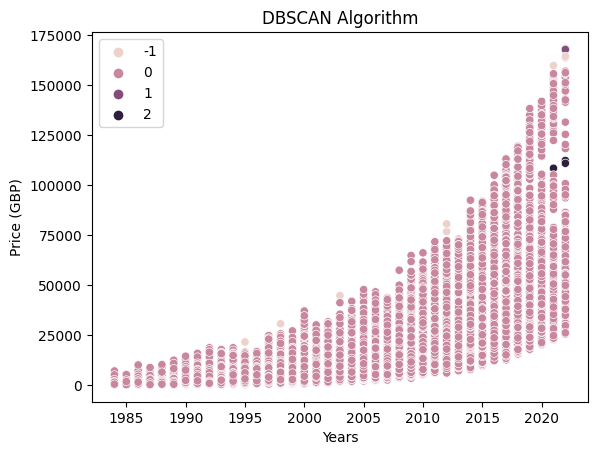

In [123]:
sns.scatterplot(data = df_cars, x = "Year of manufacture", y = "Price", hue = dbscan_labels_pred)

plt.title("DBSCAN Algorithm")
plt.xlabel("Years")
plt.ylabel("Price (GBP)")

plt.savefig('dbscan_manufac.png')
plt.show()



### Engine Size & Price

In [125]:
feature_names = ["Engine size", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# set the eps and min_samples parameters.
dbscan = DBSCAN(eps = 0.2, min_samples = 3)
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 2.6414
Silhouette Coefficient: 0.0608


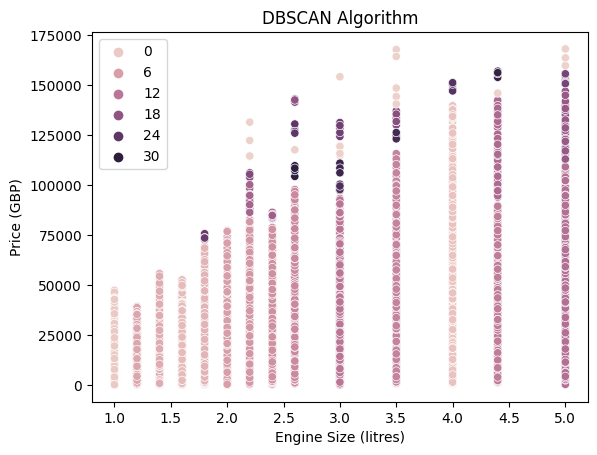

In [126]:
sns.scatterplot(data = df_cars, x = "Engine size", y = "Price", hue = dbscan_labels_pred)

plt.title("DBSCAN Algorithm")
plt.xlabel("Engine Size (litres)")
plt.ylabel("Price (GBP)")

plt.savefig('dbscan_engine.png')
plt.show()

### Mileage & Price

In [127]:
feature_names = ["Mileage", "Price"]
x = df_cars[feature_names]

scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

# set the eps and min_samples parameters.
dbscan = DBSCAN(eps = 0.2, min_samples = 3)
dbscan_labels_pred = dbscan.fit_predict(x_scaled)

db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
s_score = silhouette_score(x_scaled, dbscan_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 0.1570
Silhouette Coefficient: 0.8178


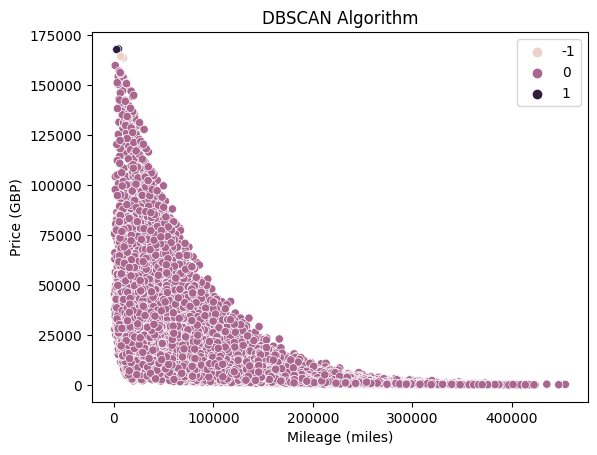

In [128]:
sns.scatterplot(data = df_cars, x = "Mileage", y = "Price", hue = dbscan_labels_pred)

plt.title("DBSCAN Algorithm")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (GBP)")

plt.savefig('dbscan_mileage.png')
plt.show()